# Explore WDI data gathered from API, and narrow down the number of indicators

02 November 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
time_series_df = pd.read_csv("../Data/WorldBank/wdi_timeseries_full.csv")

In [3]:
time_series_df.columns

Index(['country', 'decimal', 'indicator', 'value', 'year'], dtype='object')

In [4]:
num_indicators = len(time_series_df['indicator'].unique())
num_countries = len(time_series_df['country'].unique())
num_years = len(time_series_df['year'].unique())

## Plot how many countries are covered by the indicators

In [5]:
count_indicators = time_series_df.groupby('indicator').agg({'value': 'count'})
count_indicators['percent'] = count_indicators['value'] / (num_countries*num_years)

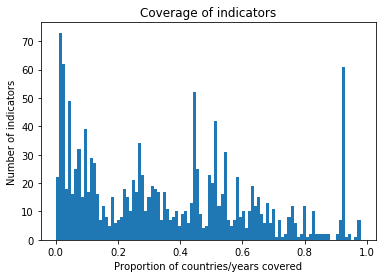

In [6]:
plt.figure()
plt.hist(count_indicators['percent'], bins=100)
plt.title("Coverage of indicators")
plt.xlabel("Proportion of countries/years covered")
plt.ylabel("Number of indicators")
plt.show()

## Plot how many states are covered by indicators

In [7]:
count_states = time_series_df.groupby('country').agg({'value': 'count'})
count_states['percent'] = count_states['value'] / (num_indicators*num_years)

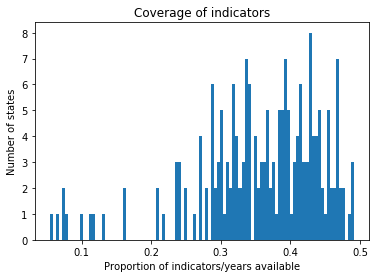

In [8]:
plt.figure()
plt.hist(count_states['percent'], bins=100)
plt.title("Coverage of indicators")
plt.xlabel("Proportion of indicators/years available")
plt.ylabel("Number of states")
plt.show()

## Plot number of indicators for countries over time
Each line is a country

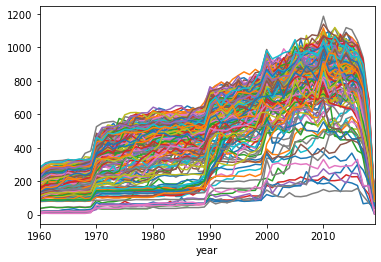

In [9]:
by_country_year = time_series_df.groupby(['country', 'year']).agg({'value': 'count'})
by_country_year.unstack('country').plot.line(legend=False)

## Plot number of countries covered by indicators over time
Each line is an indicator

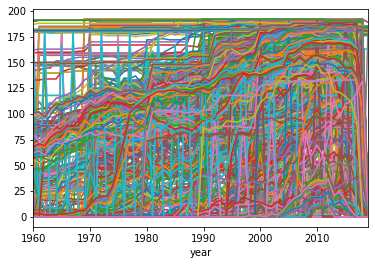

In [10]:
by_indicator_year = time_series_df.groupby(['indicator', 'year']).agg({'value': 'count'})
by_indicator_year.unstack('indicator').plot.line(legend=False)

## Plot number of indicators by earliest year of coverage

In [11]:
indicator_startyears = time_series_df.dropna(subset=['value']).groupby('indicator').agg({'year': 'min'}).reset_index().groupby('year').agg({'indicator':'count'})
indicator_startyears['cumulative'] = indicator_startyears['indicator'].cumsum()

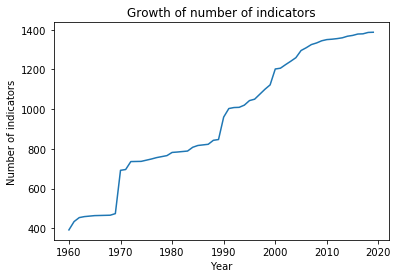

In [12]:
plt.figure()
plt.plot(indicator_startyears['cumulative'])
plt.title("Growth of number of indicators")
plt.xlabel("Year")
plt.ylabel("Number of indicators")
plt.show()

## Narrow down indicators to those with coverage since 1970

In [13]:
indicator_longesttime = time_series_df.dropna(subset=['value']).groupby('indicator').agg({'year': 'min'})
indicator_longesttime = indicator_longesttime[indicator_longesttime['year'] <= 1970]
indicators_longesttime = list(indicator_longesttime.index)
len(indicators_longesttime)

692

In [14]:
time_series_df_trimmed = time_series_df[time_series_df['indicator'].isin(indicators_longesttime)]

## Plot number of indicators by amount of country/year coverage
plot shows improved coverage for trimmed time series

In [15]:
count_states2 = time_series_df_trimmed.groupby('country').agg({'value': 'count'})
count_states2['percent'] = count_states2['value'] / (len(indicators_longesttime)*num_years)

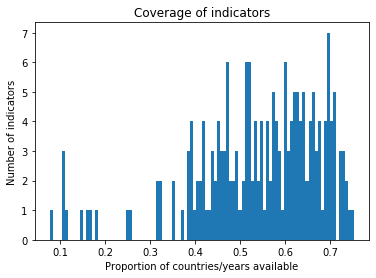

In [16]:
plt.figure()
plt.hist(count_states2['percent'], bins=100)
plt.title("Coverage of indicators")
plt.xlabel("Proportion of countries/years available")
plt.ylabel("Number of indicators")
plt.show()

## Plot all indicators by number of countries covered over time

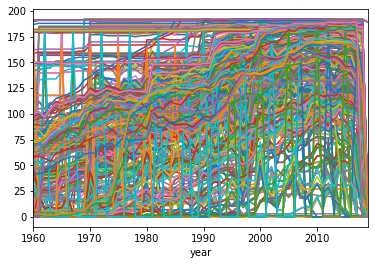

In [17]:
by_country_year = time_series_df_trimmed.groupby(['indicator', 'year']).agg({'value': 'count'})
by_country_year.unstack('indicator').plot.line(legend=False)

## Narrow down time series to indicators that cover at least 100 countries

Group by indicators and years to get number of countries with some value present. Then group by indicators and find average number of countries present for all years for that indicator.

Drop those indicators that don't have at least an average of 100 countries over time.

In [18]:
indicator_lowcountries = time_series_df_trimmed.dropna(subset=['value']).groupby(['indicator', 'year']).agg({'country': 'count'}).reset_index().groupby('indicator').agg({'country':'mean'})

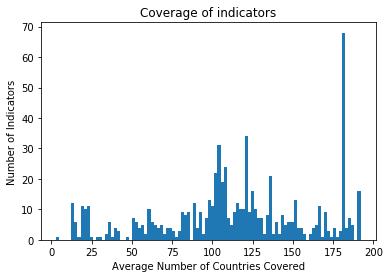

In [19]:
plt.figure()
plt.hist(indicator_lowcountries['country'], bins=100)
plt.title("Coverage of indicators")
plt.xlabel("Average Number of Countries Covered")
plt.ylabel("Number of Indicators")
plt.show()

In [20]:
indicators_enoughcountries = list(indicator_lowcountries[indicator_lowcountries['country'] >= 100].index)
len(indicators_enoughcountries)

472

## Trimmed vs Full time series

The trimmed time series only contains indicators that have data since at least 1970 and have data for (on average) at least 100 countries. This narrows the number of indicators down from 1387 to 472.

In [21]:
time_series_df_trimmed2 = time_series_df_trimmed[time_series_df_trimmed['indicator'].isin(indicators_enoughcountries)]

In [22]:
time_series_df_trimmed2.to_csv("../Data/WorldBank/wdi_timeseries_trimmed.csv")

## Top 25 indicators

The list of the top 25 most popular WDI indicators is from: https://datatopics.worldbank.org/world-development-indicators/stories/world-development-indicators-the-story.html

This dataset narrows down the full time series to just these 25 indicators.

In [23]:
top25_indicators = ['NY.GDP.MKTP.CD', 'SP.POP.TOTL', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'SI.POV.GINI', 
                    'SP.POP.TOTL.FE.IN', 'SP.DYN.TFRT.IN', 'NY.GDP.PCAP.PP.CD', 'SP.DYN.LE00.IN', 'MS.MIL.XPND.GD.ZS', 
                    'FP.CPI.TOTL.ZG', 'SP.URB.TOTL.IN.ZS', 'EN.POP.DNST', 'EN.ATM.CO2E.PC', 'SH.XPD.CHEX.GD.ZS', 
                    'SP.POP.GROW', 'ST.INT.ARVL', 'NY.GDP.PCAP.KD.ZG', 'BX.KLT.DINV.CD.WD', 'SE.XPD.TOTL.GB.ZS', 
                    'SE.ADT.LITR.ZS', 'EG.ELC.ACCS.ZS', 'SL.UEM.TOTL.ZS', 'NE.EXP.GNFS.ZS', 'SP.DYN.IMRT.IN']

time_series_df_top25 = time_series_df[time_series_df['indicator'].isin(top25_indicators)]

In [24]:
time_series_df_top25.to_csv("../Data/WorldBank/wdi_timeseries_top25.csv")